In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import mixture
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
scalerStandard.fit(X)
X_scaled=scalerStandard.transform(X)
display(X_scaled.shape)
OrigX=X
X=X_scaled

(1151, 19)

(1151, 19)

Automatically created module for IPython interactive environment
next


No handlers could be found for logger "matplotlib.legend"


array([ 62202.50129349,  54589.26868334,  46843.46299306,  44423.51584852,
        41898.14570252,  41663.5549056 ,  39153.42444986,  39412.07900938,
        38789.64714077,  37074.8064951 ,  37441.78503282,  36462.29872963,
        36511.55264583,  35683.23961157,  35501.80946483,  33998.18206128,
        34934.39043027,  34167.33672761,  33808.56543157,  22647.86547287,
        22424.36475562,  21437.31404626,  21329.35742036,  20090.0774527 ,
         3769.71977772,   2944.00113445,  14901.92305425,   -468.83935973,
        -1031.88559644, -15119.20780569,  -1976.82958458, -15446.71581813,
       -17652.89471899, -15634.28517907, -17583.4551494 , -16592.67393067,
       -18199.868175  , -18569.89540548,  62329.37224885,  19105.90588801,
        17604.30747516,   3711.80866901,  -3476.34149108,  -9485.74895453,
       -18488.2198242 , -14102.27308929, -21476.11715587, -21813.70459382,
       -22321.84283118, -24736.94353496, -22671.83470319, -28460.11515916,
       -30739.83433353, -

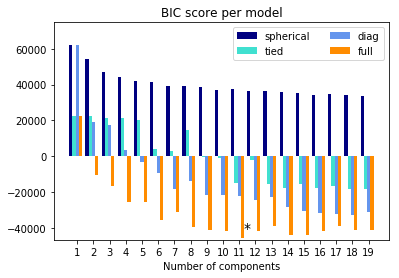

In [3]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()*1.2])
#plt.ylim(-40000,80000)

plt.legend( loc=2)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
#spl.legend([b[0] for b in bars], cv_types, bbox_to_anchor=(0., 1.02, 1., .102), loc=9,ncol=4, mode="expand", borderaxespad=0.)
spl.legend([b[0] for b in bars], cv_types,ncol=2)
plt.title('BIC score per model')
print('next')
# Plot the winner
display(bic)

In [4]:
score=[]
 
for n_components in range(1,20):
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type='full')
        gmm.fit(X)
        score.append(gmm.score(X, y=None))
display(score)

[-9.198415600975583,
 8.094666834663657,
 12.753272190683608,
 15.77780575376053,
 14.224518815481412,
 19.388646345466476,
 19.82195610168798,
 20.98387064332927,
 24.335766596586566,
 23.514028997668202,
 25.518537931228796,
 26.458892239180877,
 27.51391091143533,
 27.618890731511975,
 27.799803010615218,
 27.554813158050003,
 27.87773900604718,
 28.34192006509293,
 29.913064627435038]

([<matplotlib.axis.XTick at 0x10e6c5690>,
 <a list of 19 Text xticklabel objects>)

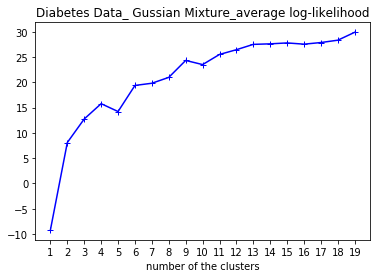

In [5]:
plt.plot(range(1,20),score,'-b+')
plt.title("Diabetes Data_ Gussian Mixture_average log-likelihood")
plt.xlabel('number of the clusters')
plt.xticks(range(1,20))

[0.70763565200598,
 0.03462128605093389,
 0.08787037494979916,
 0.11159162134846758,
 0.02889771164888948,
 0.04792786808387011,
 0.03975864010824696,
 0.0566852721988958,
 0.055093567685139434,
 0.04357531814022838,
 0.02741624450121585,
 -4.841273521873293e-05,
 0.01527878360250688,
 0.07235334224205234,
 0.009785446468286796,
 -0.009480307087456227,
 -0.011635221733012102,
 0.0009738855116161383]

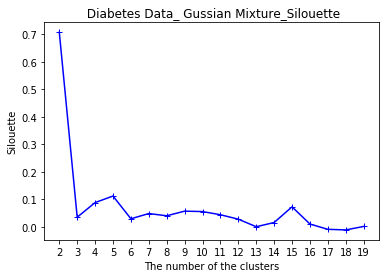

In [6]:
from sklearn.metrics import silhouette_score
s = []
for n_components in range(2,20):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(X)
    labels = gmm.predict(X)
    s.append(silhouette_score(X, labels, metric='euclidean'))
display(s)
plt.plot(range(2,20),s,'-b+')
plt.ylabel("Silouette")
plt.xlabel("The number of the clusters")
plt.xticks(range(2,20))
plt.title(" Diabetes Data_ Gussian Mixture_Silouette")
plt.show()

Automatically created module for IPython interactive environment


array([[0.        , 0.61306863, 0.        , 1.        ],
       [0.85362157, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       ...,
       [0.51762353, 1.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.85362157, 0.        , 0.        , 1.        ]])

Homogeneity for 11 cluster: 0.076 
completnenss for 11 cluster: 0.028 


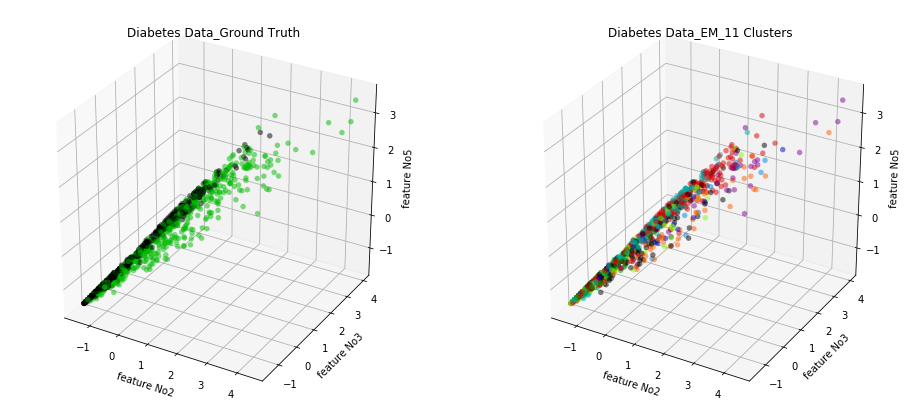

In [10]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

gmm = mixture.GaussianMixture(n_components=11, random_state=10,covariance_type='full')
gmm.fit(X)
cluster_labels = gmm.predict(X)
colorsTrue = cm.spectral(Y.astype(float)/2)
fig = plt.figure(figsize=(16, 16))
ax1=fig.add_subplot(221,projection='3d')
ax2=fig.add_subplot(222,projection='3d')
ax1.scatter(X[:, 2], X[:, 3],X[:,5], s=30,lw=0, alpha=0.5,
                c=colorsTrue, edgecolor='K');
colors = cm.spectral(cluster_labels.astype(float) /11)
display(colors)
ax2.scatter(X[:, 2], X[:, 3], X[:,5],s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')  
ax1.set_xlabel('feature No2 ')
ax1.set_ylabel('feature No3')
ax1.set_zlabel('feature No5')
ax1.set_title('Diabetes Data_Ground Truth')
ax2.set_xlabel('feature No2  ')
ax2.set_ylabel('feature No3 ')
ax2.set_zlabel('feature No5')
ax2.set_title('Diabetes Data_EM_11 Clusters')

print("Homogeneity for 11 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
#print("mutual index for 2 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 11 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))


Automatically created module for IPython interactive environment
Homogeneity for 3 cluster: 0.064 
mutual index for 3 cluster: 0.043 
completnenss for 3 cluster: 0.044 


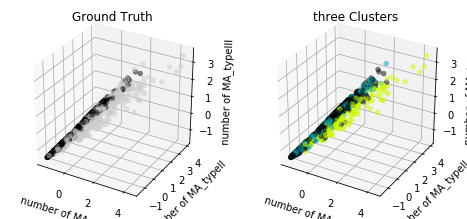

In [62]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

gmm = mixture.GaussianMixture(n_components=3,  random_state=0,covariance_type='full')
gmm.fit(X)
labels = gmm.predict(X)
colorsTrue = cm.spectral(Y.astype(float))
fig = plt.figure(figsize=(8, 8))
ax1=fig.add_subplot(221,projection='3d')
ax2=fig.add_subplot(222,projection='3d')
ax1.scatter(X[:, 2], X[:, 3],X[:,5], s=30,lw=0, alpha=0.5,
                c=colorsTrue, edgecolor='K');
colors = cm.spectral(labels.astype(float) / 3)
 
ax2.scatter(X[:, 2], X[:, 3], X[:,5],s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')  
ax1.set_xlabel('number of MA_ typeI ')
ax1.set_ylabel('number of MA_typeII')
ax1.set_zlabel('number of MA_typeIII')
ax1.set_title('Ground Truth')
ax2.set_xlabel('number of MA_ typeI ')
ax2.set_ylabel('number of MA_typeII')
ax2.set_zlabel('number of MA_typeIII')
ax2.set_title('three Clusters')

print("Homogeneity for 3 cluster: %0.3f " % metrics.homogeneity_score(Y,  labels))
print("mutual index for 3 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y,  labels))
print("completnenss for 3 cluster: %0.3f " % metrics.completeness_score(Y, labels))

[7.227560436618035e-16,
 0.033738394279906506,
 0.06397579088255913,
 0.07081630085225103,
 0.037316906692440734,
 0.07296239137532147,
 0.07954786501590669,
 0.0754668921982423,
 0.08193454072007107,
 0.09752013164490035,
 0.09475743824241602,
 0.10174653886528846,
 0.09138869097040647,
 0.08779869538869159,
 0.09368153234916571,
 0.08479104530385483,
 0.09126292851687537,
 0.08819022144020569,
 0.07398341165045966]

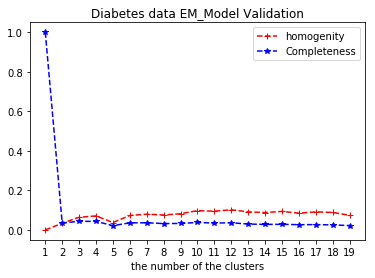

[7.227560436618035e-16,
 0.033738394279906506,
 0.06397579088255913,
 0.07081630085225103,
 0.037316906692440734,
 0.07296239137532147,
 0.07954786501590669,
 0.0754668921982423,
 0.08193454072007107,
 0.09752013164490035,
 0.09475743824241602,
 0.10174653886528846,
 0.09138869097040647,
 0.08779869538869159,
 0.09368153234916571,
 0.08479104530385483,
 0.09126292851687537,
 0.08819022144020569,
 0.07398341165045966]

[1.0,
 0.03485090687233891,
 0.04365084488586841,
 0.043211193267560524,
 0.02166759055053325,
 0.03567988729525902,
 0.035958570615722434,
 0.03222958433998021,
 0.032589774840425745,
 0.03769994722770752,
 0.034478085975654355,
 0.03609075127355234,
 0.029682459200135614,
 0.02777380425151976,
 0.028296413328301108,
 0.02646478819909239,
 0.02691720020204307,
 0.025302172153104544,
 0.021985978879125387]

In [3]:
from sklearn.metrics import silhouette_score
homogenity = []
complete=[]
for n_components in range(1,20):
        gmm = mixture.GaussianMixture(n_components=n_components,  random_state=0,covariance_type='full')
        gmm.fit(X)
        labels = gmm.predict(X)
        homogenity.append(metrics.homogeneity_score(Y,  labels))
        complete.append(metrics.completeness_score(Y,  labels))
display(homogenity)
plt.plot(range(1,20),homogenity,'--+',color="r")
plt.plot(range(1,20),complete,'--*',color="b")
plt.legend([ 'homogenity','Completeness',])
plt.xticks(range(1,20))
plt.xlabel("the number of the clusters")
plt.title("Diabetes data EM_Model Validation")
plt.show()
display(homogenity)
display(complete)